In [201]:
# Suppressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing, metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [128]:
# Load the dataset
df = pd.read_csv('weatherdata.csv')
# Display the first few rows of the dataframe
print(df.head())


       Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0  1/2/2013     20.7     20.9     19.5     22.4      15.6       Yes   
1  2/2/2013     22.4     24.8     19.5     25.6       6.0       Yes   
2  3/2/2013     23.5     23.0     21.6     24.5       6.6       Yes   
3  4/2/2013     21.4     20.9     20.2     22.8      18.8       Yes   
4  5/2/2013     22.5     25.5     19.7     25.7      77.4       Yes   

   Evaporation  Sunshine WindGustDir  ...  WindDir9am WindDir3pm WindSpeed9am  \
0          6.2       0.0           W  ...           S        SSW         17.0   
1          3.4       2.7           W  ...           W          E          9.0   
2          2.4       0.1           W  ...         ESE        ESE         17.0   
3          2.2       0.0           W  ...         NNE          E         22.0   
4          4.8       0.0           W  ...         NNE          W         11.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0    

In [132]:
#DATA CLEANING
# Handle Missing Values
# Let's fill missing numerical values with the mean of their respective columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [134]:
# For categorical variables, let's fill missing values with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [136]:
# Convert Categorical Variables into Numerical using One-Hot Encoding for categorical variables
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_cols)

In [137]:
# Separate Features and Target Variable
X = df.drop(['Date', 'RainToday', 'Rainfall'], axis=1)  # Features
y = df['Rainfall']  # Target variable

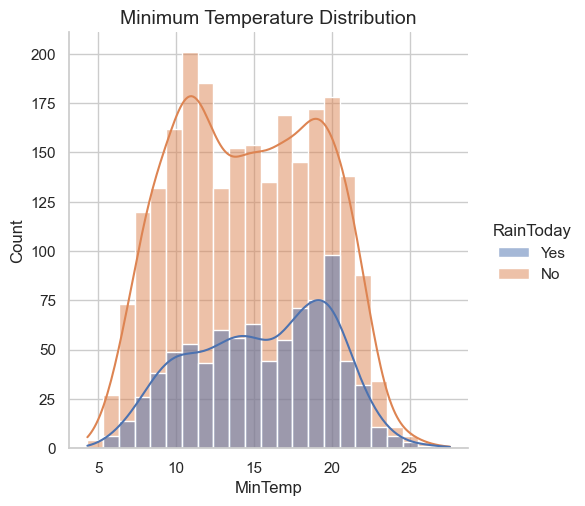

In [129]:
#Data Analysis: feature distribution
#MIN TEMP
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

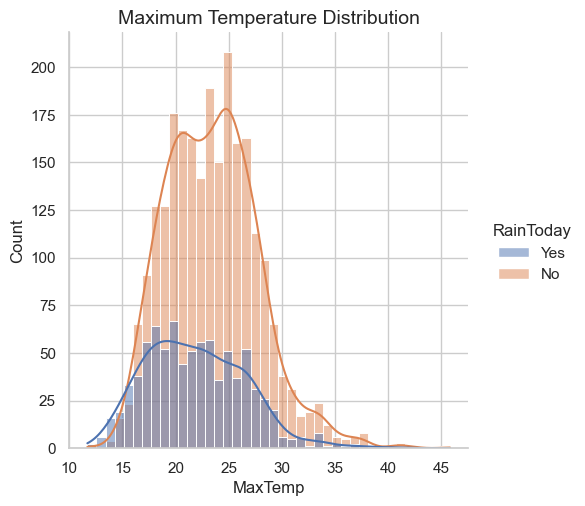

In [130]:
#Data Analysis: feature distribution
#MAX TEMP
sns.displot(df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

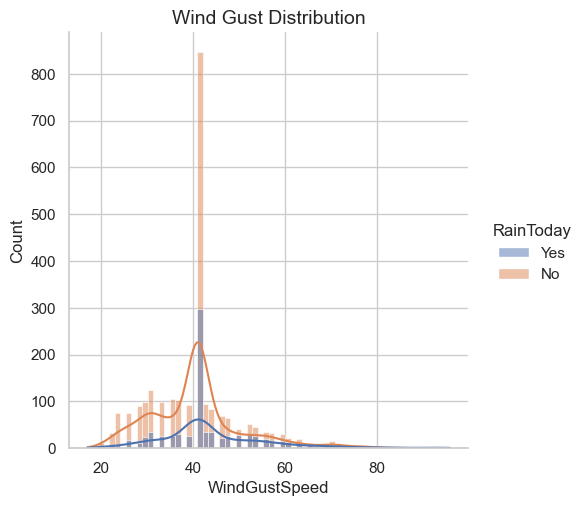

In [124]:
#Data Analysis: feature distribution
#WINDGUSTDIST
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

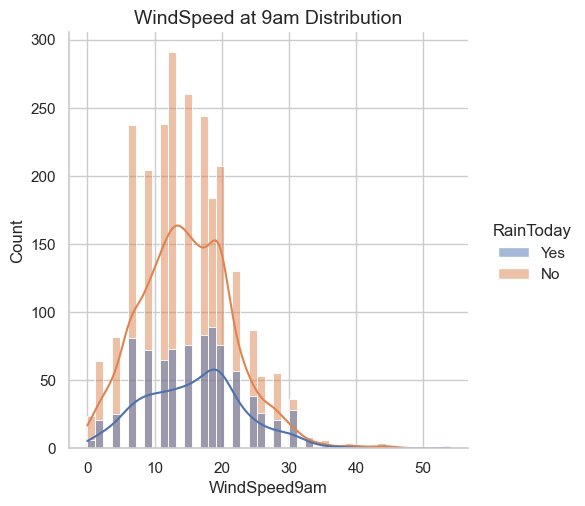

In [47]:
#Data Analysis: feature distribution
#WINDGUSTDIST 9AM
sns.displot(df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

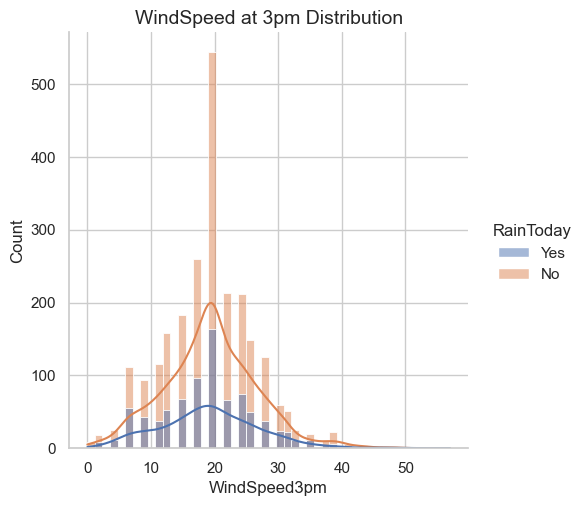

In [48]:
#Data Analysis: feature distribution
#WINDGUSTDIST 3PM
sns.displot(df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

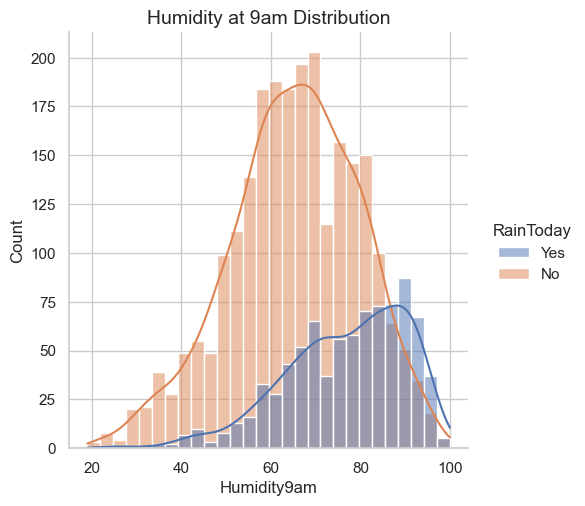

In [49]:
#Data Analysis: feature distribution
#HUMIDITY 9AM
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()


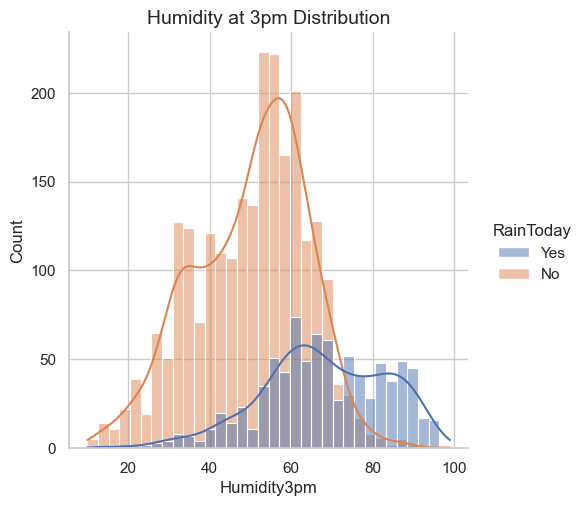

In [50]:
#Data Analysis: feature distribution
#HUMIDITY 3PM
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

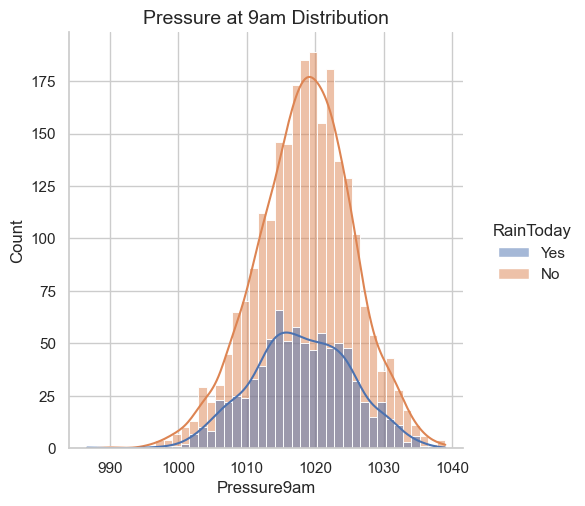

In [51]:
#Data Analysis: feature distribution
#PRESSURE 9AM
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()


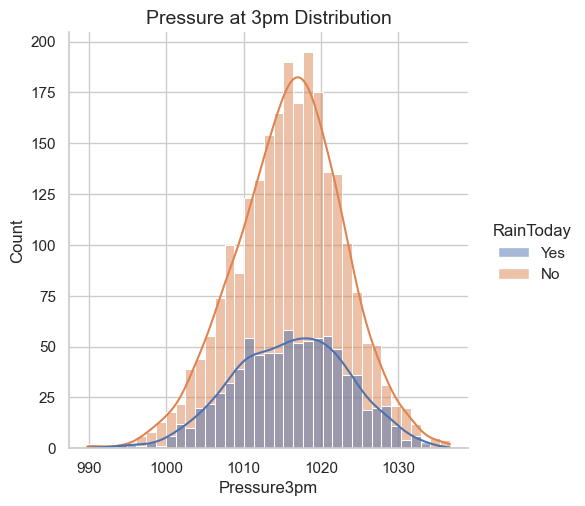

In [52]:
#Data Analysis: feature distribution
#PRESSURE 3PM
sns.displot(df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

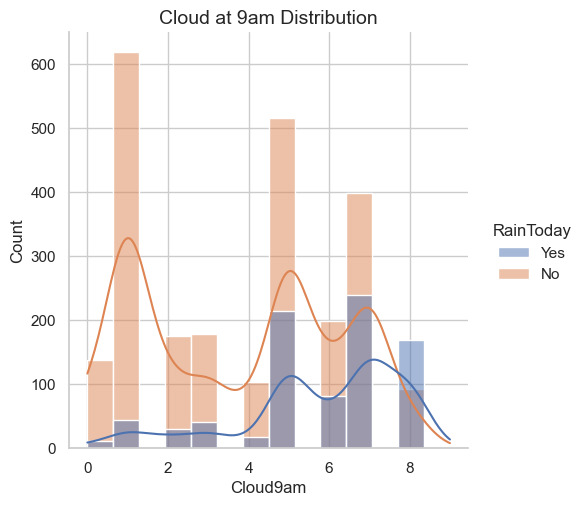

In [53]:
#Data Analysis: feature distribution
#CLOUD-DIST 9AM
sns.displot(df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

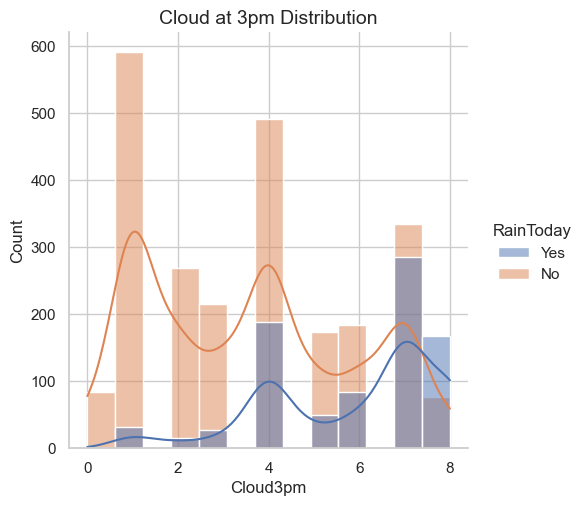

In [125]:
#Data Analysis: feature distribution
#CLOUD-DIST 3PM
sns.displot(df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()


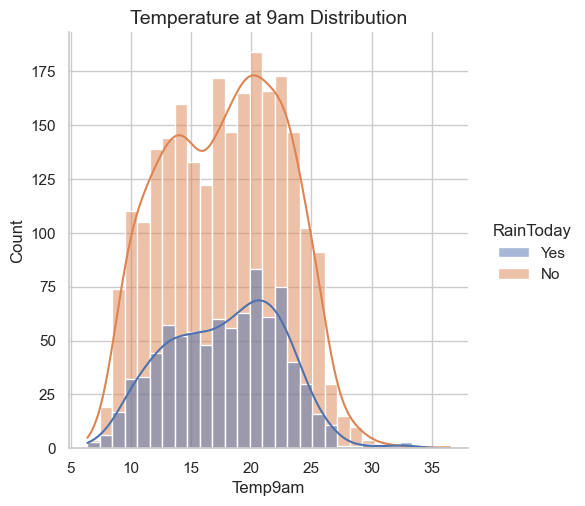

In [55]:
#Data Analysis: feature distribution
#CLOUD-DIST 9AM
sns.displot(df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()


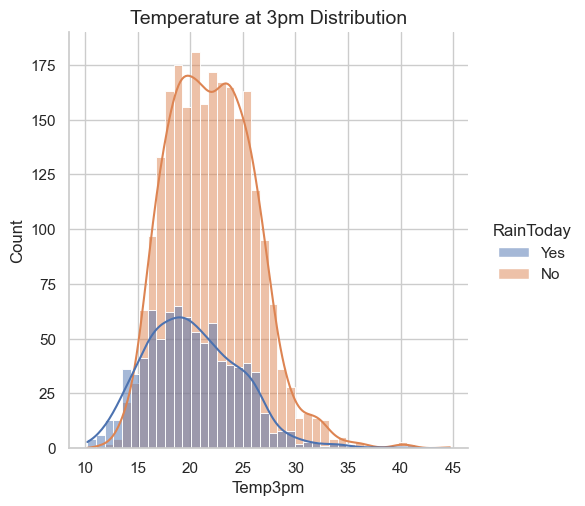

In [56]:
#Data Analysis: feature distribution
#CLOUD-DIST 3PM
sns.displot(df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()


In [175]:
#Data Analysis: EDA
#AVG WINDSPEED ANALYSIS
# Convert 'Date' column to string format
df['Date'] = df['Date'].astype(str)
windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df

Date  WindSpeed9am  WindSpeed3pm
0           14.761316     19.335958
1     0     15.250000     19.649123
2     1     15.088106     19.427313
3     2     15.938326     19.748899
4     3     15.317181     19.462555
5     4     15.898678     19.061674
6     5     15.555066     18.735683
7     6     15.123348     18.960352
8     7     15.215859     19.189427
9     8     14.356828     19.030837
10    9     14.418502     19.493392

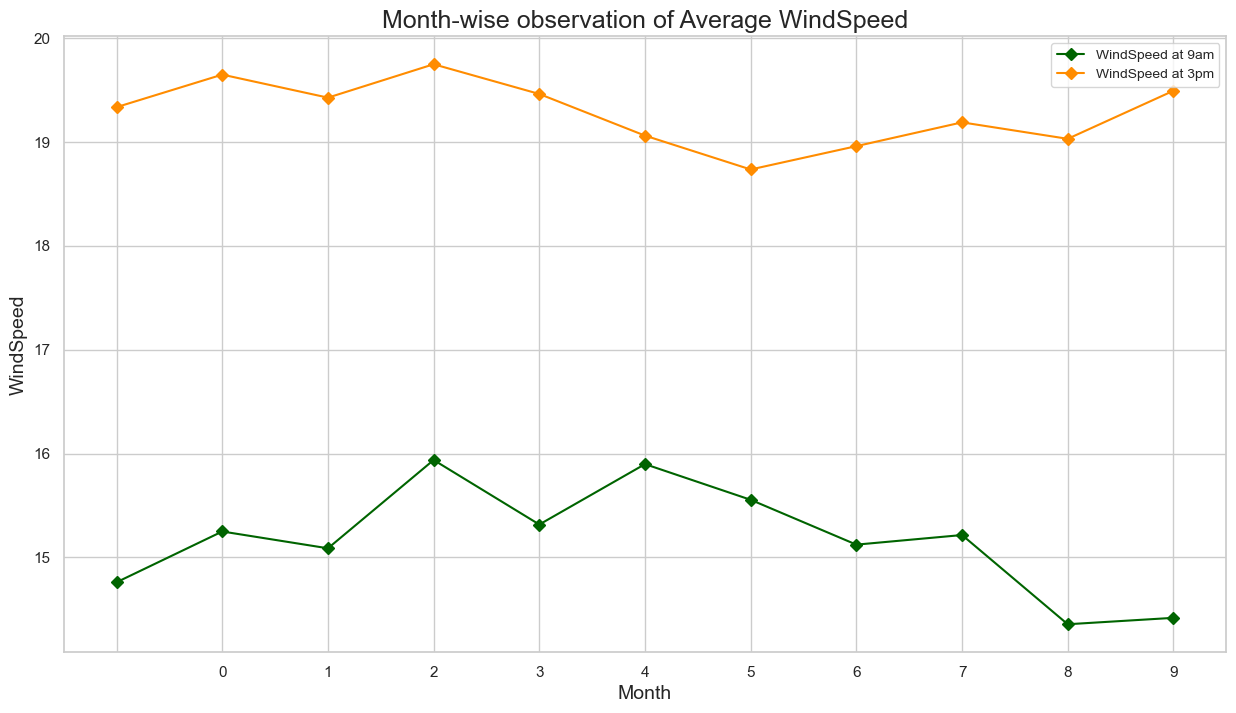

In [176]:
#Data Analysis: EDA
#AVG WINDSPEED OBSERVATION (LINE PLOT) 
x = windspeed_weather_df.loc[:, 'Date']
y1 = windspeed_weather_df['WindSpeed9am'] 
y2 = windspeed_weather_df['WindSpeed3pm']
plt.figure(figsize = (15, 8))
plt.plot(x, y1, marker='D', color = 'darkgreen', label = 'WindSpeed at 9am') 
plt.plot(x, y2, marker='D', color = 'darkorange', label = 'WindSpeed at 3pm')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Month-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.show()

In [177]:
#Data Analysis: EDA
#AVG HUMIDITY ANALYSIS
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df

Date  Humidity9am  Humidity3pm
0          68.253990    54.931767
1     0    68.973684    55.039474
2     1    67.233480    53.837004
3     2    68.541850    54.237885
4     3    67.590308    54.268722
5     4    68.356828    56.392070
6     5    66.969163    52.599119
7     6    68.792952    55.246696
8     7    68.418502    54.594714
9     8    67.753304    54.674009
10    9    69.762115    55.066079

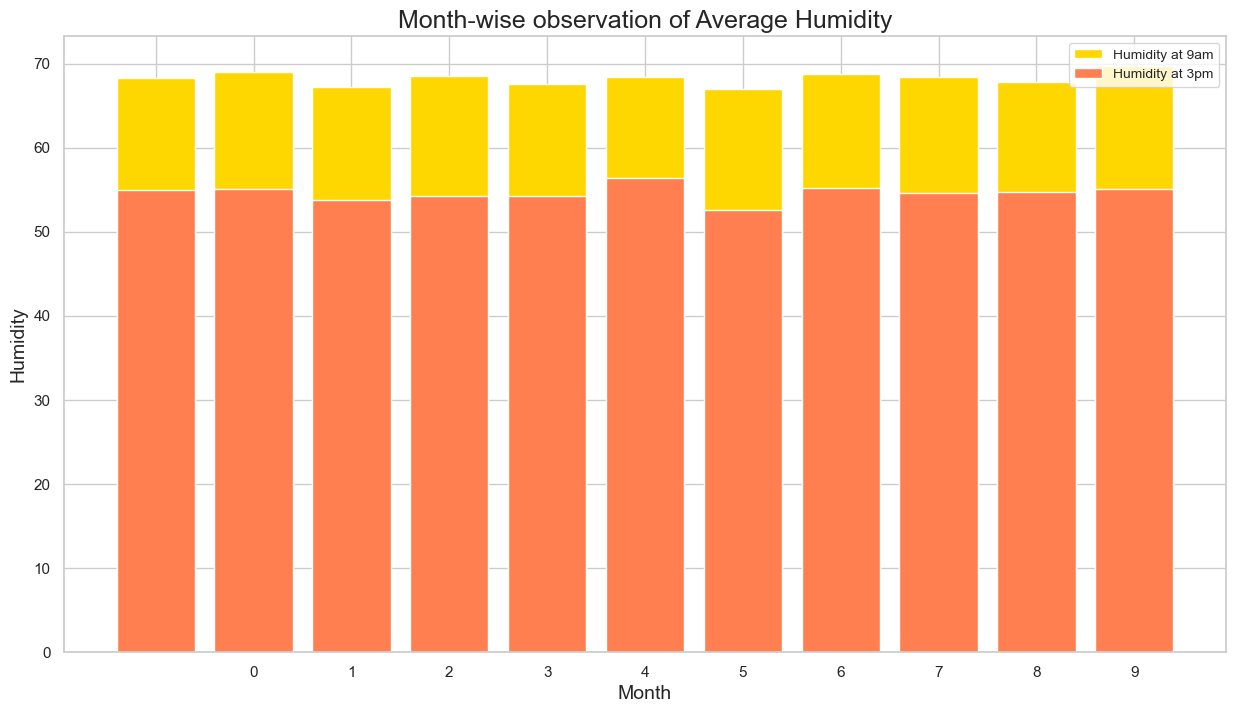

In [178]:
#Data Analysis: EDA
#AVG HUMIDITY ANALYSIS OBSERVATION (STACKED BAR PLOT)
x = humidity_weather_df.loc[:, 'Date']
y1 = humidity_weather_df['Humidity9am'] 
y2 = humidity_weather_df['Humidity3pm']
plt.figure(figsize = (15, 8))
plt.bar(x, y1, color = 'gold', label = 'Humidity at 9am') 
plt.bar(x, y2, color = 'coral',label = 'Humidity at 3pm')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Month-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.show()

In [179]:
#Data Analysis: EDA
#AVG PRESSURE ANALYSIS
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df

Date  Pressure9am  Pressure3pm
0        1018.534500  1016.175128
1     0  1018.384649  1016.080263
2     1  1017.613656  1015.242731
3     2  1018.659031  1016.343172
4     3  1018.268282  1015.970925
5     4  1018.127313  1015.986784
6     5  1018.383260  1016.066079
7     6  1018.394714  1015.975132
8     7  1017.971806  1015.606608
9     8  1018.233921  1015.918767
10    9  1018.425110  1016.081396

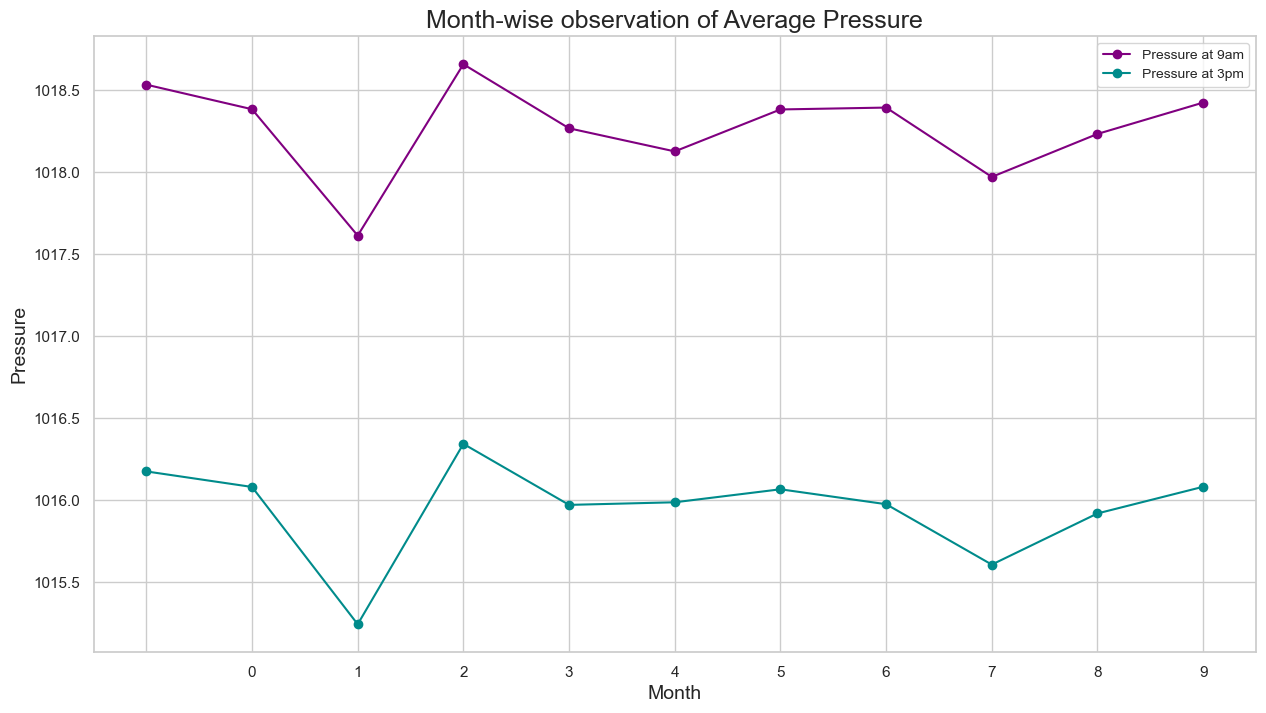

In [180]:
#Data Analysis: EDA
#AVG PRESSURE ANALYSIS (LINE PLOT)
x = pressure_weather_df.loc[:, 'Date']
y1 = pressure_weather_df['Pressure9am'] 
y2 = pressure_weather_df['Pressure3pm']
plt.figure(figsize = (15, 8))
plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am') 
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.show()

In [181]:
#Data Analysis: EDA
#Correlation and Description of the data
bf=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])
bf.corr()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  \
Temp9am        1.000000  0.828457  0.939307  0.858639 -0.054297     0.606122   
Temp3pm        0.828457  1.000000  0.753147  0.960805 -0.142748     0.474599   
MinTemp        0.939307  0.753147  1.000000  0.771005  0.013995     0.569316   
MaxTemp        0.858639  0.960805  0.771005  1.000000 -0.139306     0.510334   
Rainfall      -0.054297 -0.142748  0.013995 -0.139306  1.000000    -0.110343   
Evaporation    0.606122  0.474599  0.569316  0.510334 -0.110343     1.000000   
Sunshine       0.113891  0.345528 -0.063475  0.327422 -0.308962     0.175932   
WindGustSpeed  0.159570  0.036216  0.127792  0.073184  0.149811     0.245426   
WindSpeed9am  -0.334084 -0.351836 -0.298040 -0.349382  0.153696    -0.077532   
WindSpeed3pm   0.280009  0.136713  0.225905  0.155542  0.039415     0.292469   
Humidity9am   -0.145944 -0.155192  0.053946 -0.185382  0.332636    -0.395651   
Humidity3pm    0.131855 -0.212696  0.273269 -0.150741  0.305635    -0.102295   
Pressure9am   -0.417437 -0.342862 -0.391654 -0.385853 -0.037561    -0.343581   
Pressure3pm   -0.401353 -0.387945 -0.353334 -0.420375  0.001780    -0.298303   
Cloud9am       0.093204 -0.086544  0.241248 -0.084695  0.245231    -0.037051   
Cloud3pm       0.068683 -0.144965  0.164028 -0.099217  0.200999    -0.038422   

               Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
Temp9am        0.113891       0.159570     -0.334084      0.280009   
Temp3pm        0.345528       0.036216     -0.351836      0.136713   
MinTemp       -0.063475       0.127792     -0.298040      0.225905   
MaxTemp        0.327422       0.073184     -0.349382      0.155542   
Rainfall      -0.308962       0.149811      0.153696      0.039415   
Evaporation    0.175932       0.245426     -0.077532      0.292469   
Sunshine       1.000000      -0.029032     -0.058410      0.177813   
WindGustSpeed -0.029032       1.000000      0.256460      0.509825   
WindSpeed9am  -0.058410       0.256460      1.000000      0.197669   
WindSpeed3pm   0.177813       0.509825      0.197669      1.000000   
Humidity9am   -0.490631      -0.225613     -0.189763     -0.288910   
Humidity3pm   -0.586476      -0.095037     -0.148849     -0.135039   
Pressure9am   -0.047789      -0.408876      0.003737     -0.333810   
Pressure3pm   -0.094507      -0.351850      0.091878     -0.277749   
Cloud9am      -0.665014       0.024275     -0.062441     -0.050932   
Cloud3pm      -0.677861       0.044016     -0.018030     -0.095435   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Temp9am          -0.145944     0.131855    -0.417437    -0.401353  0.093204   
Temp3pm          -0.155192    -0.212696    -0.342862    -0.387945 -0.086544   
MinTemp           0.053946     0.273269    -0.391654    -0.353334  0.241248   
MaxTemp          -0.185382    -0.150741    -0.385853    -0.420375 -0.084695   
Rainfall          0.332636     0.305635    -0.037561     0.001780  0.245231   
Evaporation      -0.395651    -0.102295    -0.343581    -0.298303 -0.037051   
Sunshine         -0.490631    -0.586476    -0.047789    -0.094507 -0.665014   
WindGustSpeed    -0.225613    -0.095037    -0.408876    -0.351850  0.024275   
WindSpeed9am     -0.189763    -0.148849     0.003737     0.091878 -0.062441   
WindSpeed3pm     -0.288910    -0.135039    -0.333810    -0.277749 -0.050932   
Humidity9am       1.000000     0.657933     0.262098     0.249202  0.431550   
Humidity3pm       0.657933     1.000000     0.151608     0.179611  0.463529   
Pressure9am       0.262098     0.151608     1.000000     0.963307 -0.015889   
Pressure3pm       0.249202     0.179611     0.963307     1.000000  0.013787   
Cloud9am          0.431550     0.463529    -0.015889     0.013787  1.000000   
Cloud3pm          0.331062     0.472248    -0.039509    -0.003536  0.604359   

               Cloud3pm  
Temp9am        0.068683  
Temp3pm       -0.144965  
MinTemp        0.164028  
MaxTemp       -0

In [182]:
df.describe()

Temp9am      Temp3pm      MinTemp      MaxTemp     Rainfall  \
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     17.821461    21.543656    14.877102    23.005564     3.342158   
std       4.893568     4.296396     4.554014     4.483067     9.916230   
min       6.400000    10.200000     4.300000    11.700000     0.000000   
25%      13.800000    18.400000    11.000000    19.600000     0.000000   
50%      18.200000    21.300000    14.900000    22.850000     0.000000   
75%      21.700000    24.500000    18.800000    26.000000     1.400000   
max      36.500000    44.700000    27.600000    45.800000   119.400000   

         RainToday  Evaporation     Sunshine  WindGustDir  WindGustSpeed  \
count  3272.000000  3272.000000  3272.000000  3272.000000    3272.000000   
mean      0.259474     5.175787     7.168970     9.533619      41.476307   
std       0.438413     2.757262     3.815383     4.594878      10.805299   
min       0.000000     0.000000     0.000000     0.000000      17.000000   
25%       0.000000     3.200000     4.275000     5.000000      35.000000   
50%       0.000000     4.800000     8.300000    13.000000      41.000000   
75%       1.000000     7.000000    10.200000    13.000000      44.000000   
max       1.000000    18.400000    13.600000    15.000000      96.000000   

        WindDir9am   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
count  3272.000000  3272.000000   3272.000000   3272.000000  3272.000000   
mean     10.185819     5.819682     15.077041     19.294405    68.243962   
std       4.424958     4.993595      7.042748      7.452191    15.083821   
min       0.000000     0.000000      0.000000      0.000000    19.000000   
25%       8.000000     1.000000     11.000000     15.000000    58.000000   
50%      13.000000     4.000000     15.000000     19.000000    69.000000   
75%      13.000000    10.000000     20.000000     24.000000    80.000000   
max      15.000000    15.000000     54.000000     57.000000   100.000000   

       Humidity3pm  Pressure9am  Pressure3pm     Cloud9am     Cloud3pm  
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000  
mean     54.698563  1018.334424  1016.003085     4.318557     4.176093  
std      16.276753     7.019017     7.018842     2.526537     2.410905  
min      10.000000   986.700000   989.800000     0.000000     0.000000  
25%      44.000000  1013.700000  1011.300000     2.000000     2.000000  
50%      56.000000  1018.600000  1016.300000     5.000000     4.000000  
75%      64.000000  1023.100000  1020.800000     7.000000     7.000000  
max      99.000000  1039.000000  1036.700000     9.000000     8.000000

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3272 non-null   object 
 1   Temp9am        3272 non-null   float64
 2   Temp3pm        3272 non-null   float64
 3   MinTemp        3272 non-null   float64
 4   MaxTemp        3272 non-null   float64
 5   Rainfall       3272 non-null   float64
 6   RainToday      3272 non-null   int32  
 7   Evaporation    3272 non-null   float64
 8   Sunshine       3272 non-null   float64
 9   WindGustDir    3272 non-null   int32  
 10  WindGustSpeed  3272 non-null   float64
 11  WindDir9am     3272 non-null   int32  
 12  WindDir3pm     3272 non-null   int32  
 13  WindSpeed9am   3272 non-null   float64
 14  WindSpeed3pm   3272 non-null   float64
 15  Humidity9am    3272 non-null   float64
 16  Humidity3pm    3272 non-null   float64
 17  Pressure9am    3272 non-null   float64
 18  Pressure

<Axes: >

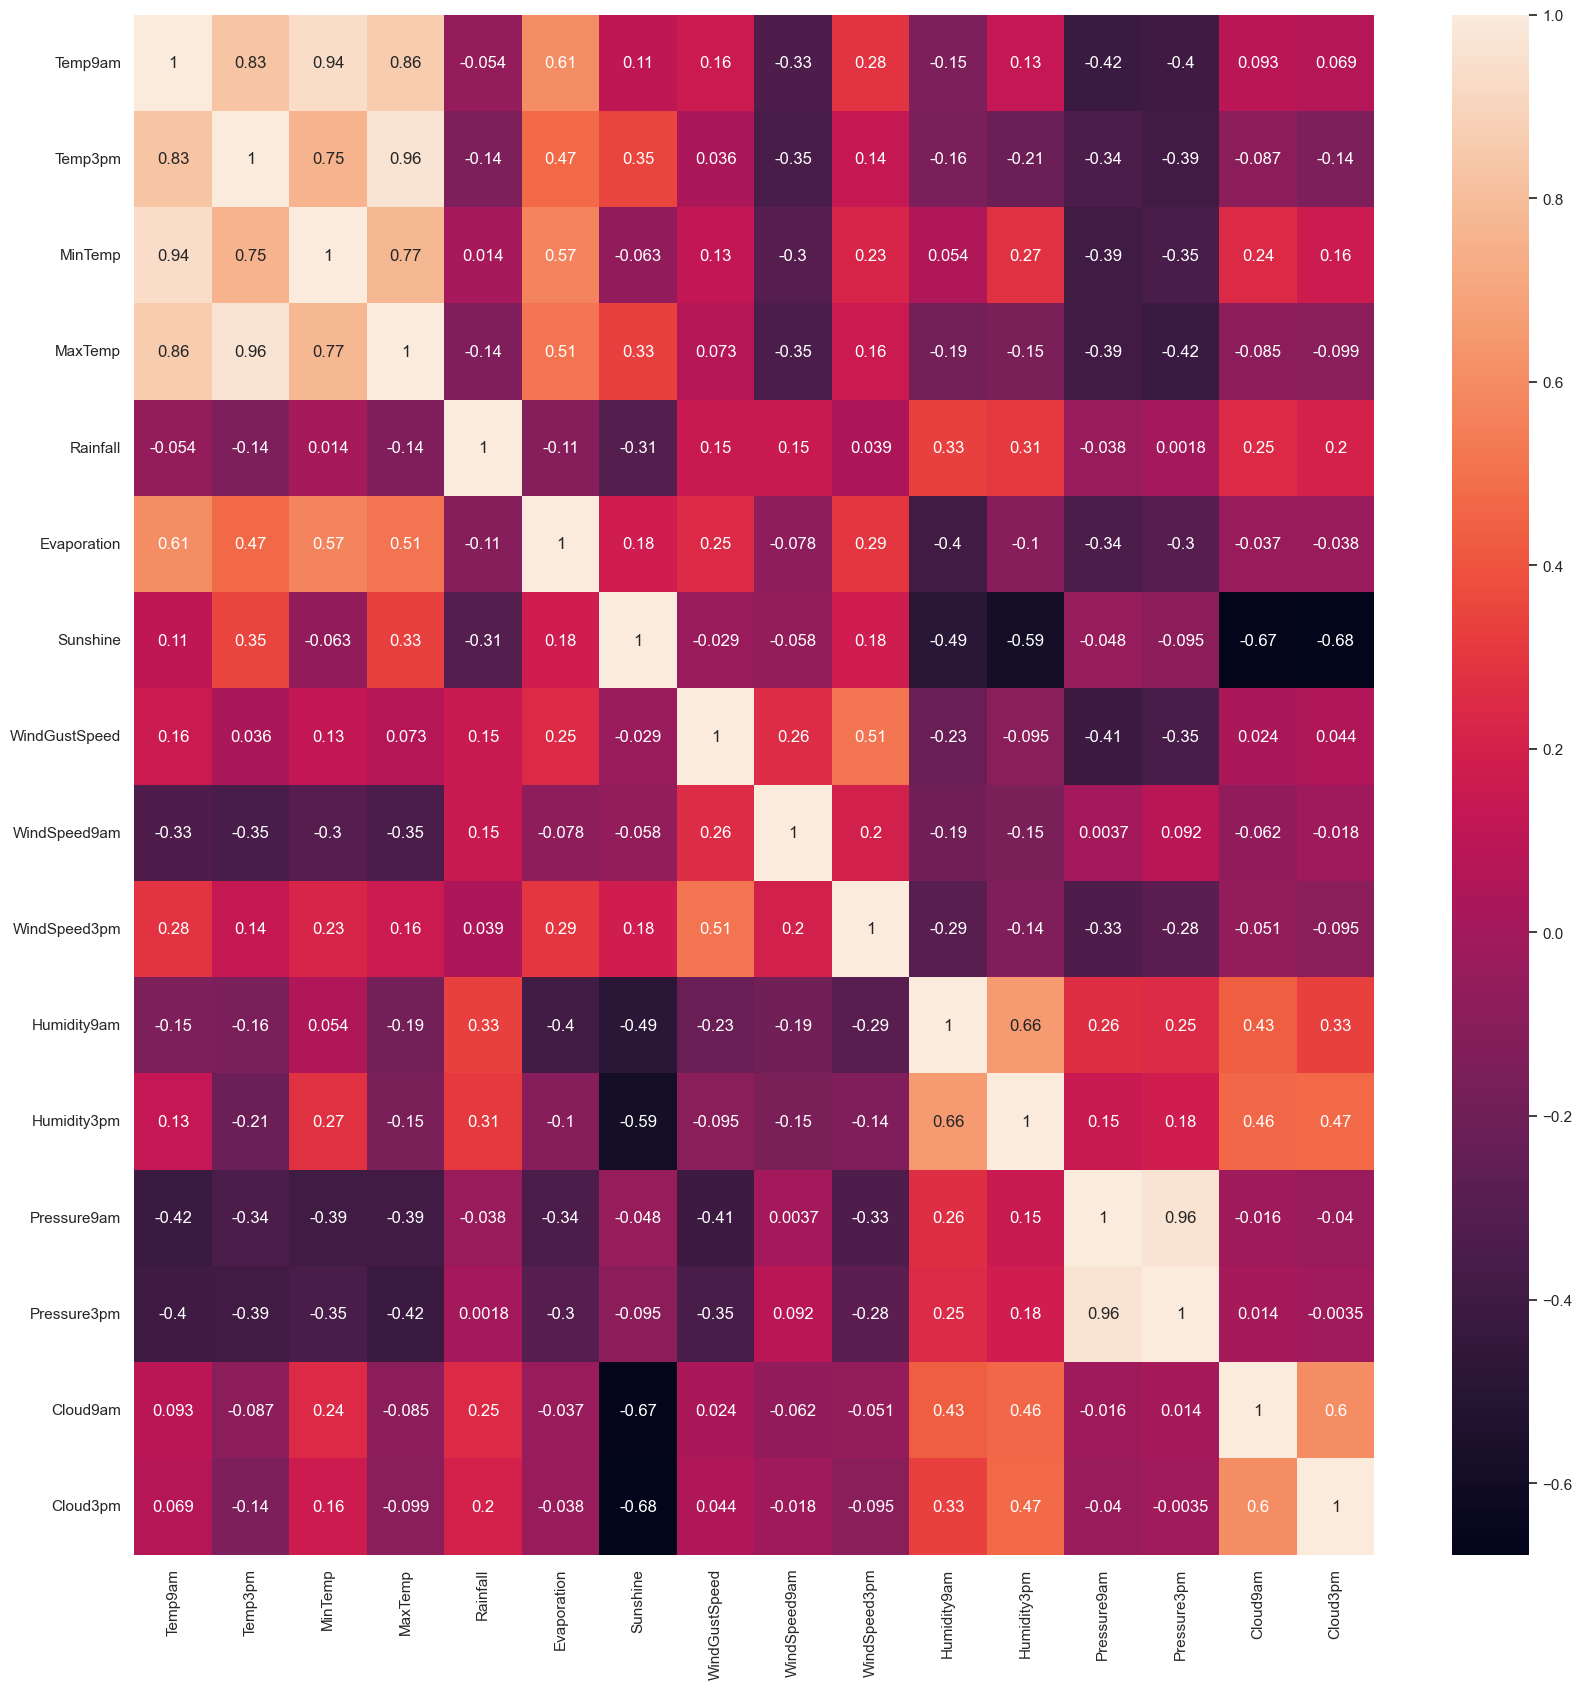

In [184]:
#Data Analysis: EDA
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)

In [212]:
#Data Preprocessing
#Standardize the Variables
scaler = StandardScaler()
scaler.fit(bf)
scaled_features = scaler.transform(bf)
df_feat = pd.DataFrame(scaled_features,columns=bf.columns[:16])
selected_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]
df_feat[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']] = selected_columns.copy()
df_feat.head()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.588319 -0.149836  1.015281 -0.135099  1.236328     0.371517 -1.879252   
1  0.935767  0.758040  1.015281  0.578807  0.268070    -0.644138 -1.171482   
2  1.160586  0.339020  1.476483  0.333402  0.328587    -1.006872 -1.853038   
3  0.731386 -0.149836  1.169015 -0.045860  1.559081    -1.079419 -1.879252   
4  0.956205  0.920992  1.059205  0.601117  7.469488    -0.136311 -1.879252   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  Pressure9am  \
0      -0.044088      0.273083      0.094697  ...     1.800477    -0.104649   
1      -0.044088     -0.863011     -0.844767  ...     1.124563    -0.061902   
2      -0.044088      0.273083     -2.321069  ...     1.923370    -0.232892   
3      -0.044088      0.983141      0.094697  ...     2.169157    -0.589122   
4      -0.044088     -0.578988     -1.784232  ...     1.186010    -1.429824   

   Pressure3pm  Cloud9am  Cloud3pm  Date RainToday  WindGustDir  WindDir9am  \
0     0.199054  1.457333  1.586330    36         1           13           8   
1     0.056559  1.061474  1.171485  1220         1           13          13   
2    -0.057438  1.061474  1.586330  2391         1           13           2   
3    -0.598920  1.457333  1.586330  2659         1           13           5   
4    -1.596388  1.457333  1.586330  2767         1           13           5   

   WindDir3pm  
0          11  
1           0  
2           2  
3           0  
4          13  

[5 rows x 21 columns]

In [213]:
#Transforming Categorical Variables:to convert categorical variables to binary variables to select what only neeed
df_proc = pd.get_dummies(data=df_feat, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc.head()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.588319 -0.149836  1.015281 -0.135099  1.236328     0.371517 -1.879252   
1  0.935767  0.758040  1.015281  0.578807  0.268070    -0.644138 -1.171482   
2  1.160586  0.339020  1.476483  0.333402  0.328587    -1.006872 -1.853038   
3  0.731386 -0.149836  1.169015 -0.045860  1.559081    -1.079419 -1.879252   
4  0.956205  0.920992  1.059205  0.601117  7.469488    -0.136311 -1.879252   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindDir3pm_6  WindDir3pm_7  \
0      -0.044088      0.273083      0.094697  ...         False         False   
1      -0.044088     -0.863011     -0.844767  ...         False         False   
2      -0.044088      0.273083     -2.321069  ...         False         False   
3      -0.044088      0.983141      0.094697  ...         False         False   
4      -0.044088     -0.578988     -1.784232  ...         False         False   

   WindDir3pm_8  WindDir3pm_9  WindDir3pm_10  WindDir3pm_11 WindDir3pm_12  \
0         False         False          False           True         False   
1         False         False          False          False         False   
2         False         False          False          False         False   
3         False         False          False          False         False   
4         False         False          False          False         False   

   WindDir3pm_13  WindDir3pm_14  WindDir3pm_15  
0          False          False          False  
1          False          False          False  
2          False          False          False  
3          False          False          False  
4           True          False          False  

[5 rows x 66 columns]

In [214]:
# replace the values of the 'RainToday' column changing them from a categorical column to a binary column. 
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainToday']]

Date  RainToday
0       36          1
1     1220          1
2     2391          1
3     2659          1
4     2767          1
...    ...        ...
3267   332          0
3268   440          0
3269   548          0
3270   656          0
3271     0          0

[3272 rows x 2 columns]

In [215]:
df_proc.drop('Date',axis=1,inplace=True)

In [216]:
#Data Preprocessing
#Rainfall Occurance Prediction
df_proc = df_proc.astype(float)
features = df_proc.drop(columns='RainToday', axis=1)
Y = df_proc['RainToday']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

In [217]:
#Logistic Regression Model
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [193]:
#KNN Classification Model
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [194]:
#Decision Tree Classification Model
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [195]:
#SVM Classification Model
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [196]:
#Random Forest Classification Model
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [198]:
#Classification Report on Ranfall Occurance Prediction
LR_Accuracy_Score=metrics.accuracy_score(LR.predict(x_test),y_test)
KNN_Accuracy_Score=metrics.accuracy_score(KNN.predict(x_test.values),y_test)
Tree_Accuracy_Score=metrics.accuracy_score(Tree.predict(x_test.values),y_test)
SVM_Accuracy_Score=metrics.accuracy_score(SVM.predict(x_test.values),y_test)
RFC_Accuracy_Score=metrics.accuracy_score(RFC.predict(x_test.values),y_test)
eclf_Accuracy_Score=metrics.accuracy_score(eclf.predict(x_test.values),y_test)

LR_F1_Score=metrics.f1_score(LR.predict(x_test),y_test)
KNN_F1_Score=metrics.f1_score(KNN.predict(x_test.values),y_test,average='weighted')
Tree_F1_Score=metrics.f1_score(Tree.predict(x_test.values),y_test)
SVM_F1_Score=metrics.f1_score(SVM.predict(x_test.values),y_test)
RFC_F1_Score=metrics.f1_score(RFC.predict(x_test.values),y_test)
eclf_F1_Score=metrics.f1_score(eclf.predict(x_test.values),y_test)

Report = {'Classification Algorithm': ['Logistic Regression','KNN', 'Decision Tree',  'SVM','Random Forest','Ensembled Classifier'],
          'Accuracy Score': [LR_Accuracy_Score,KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score, RFC_Accuracy_Score,eclf_Accuracy_Score],
          'F1-score': [LR_F1_Score,KNN_F1_Score, Tree_F1_Score, SVM_F1_Score, RFC_F1_Score,eclf_F1_Score],}
Report = pd.DataFrame(Report)
Report

Classification Algorithm  Accuracy Score  F1-score
0      Logistic Regression        0.826353  0.613592
1                      KNN        0.809773  0.835327
2            Decision Tree        0.749564  0.524046
3                      SVM        0.823735  0.600791
4            Random Forest        0.834206  0.609053
5     Ensembled Classifier        0.828098  0.597137

In [202]:
#visualizing of accuracies 
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()


In [218]:
#Data Preprocessing
#Rainfall Amount Prediction
df_proc = df_proc.astype(float)
features = df_proc.drop(columns='Rainfall', axis=1)
Y = df_proc['Rainfall']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

In [219]:
#Linear Regression
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [220]:
#Random Forest Regression Model
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [221]:
# SVM Regression Model
SVRR = SVR()
SVRR.fit(x_train, y_train)

SVR()

In [223]:
#Regression report on rainfall amount prediction
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVRR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVRR.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE],}
Report = pd.DataFrame(Report)
Report

Regression Algorithm       MAE      RMSE
0    Linear Regression  0.482365  0.870991
1        Random Forest  0.373415  0.813171
2                  SVM  0.333742  0.879352

In [224]:
#visualizing of accuracies 
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()


In [225]:
#Average Temperature of a day Prediction
df_proc = df_proc.astype(float)
df_proc['AvgTemp']=df_proc[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
features = df_proc.drop(columns=['Temp9am', 'Temp3pm','MinTemp','MaxTemp','AvgTemp'], axis=1)
Y = df_proc['AvgTemp']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

In [226]:
#Linear Regression
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [227]:
#Random Forest Regression Model
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [228]:
#SVM Regression Model
SVR=SVR()
SVR.fit(x_train, y_train)

SVR()

In [229]:
#Regression report on average temperature prediction
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVR.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE],}
Report = pd.DataFrame(Report)
Report

Regression Algorithm       MAE      RMSE
0    Linear Regression  0.470812  0.598336
1        Random Forest  0.439175  0.558385
2                  SVM  0.424299  0.546106

In [230]:
#visualization of accuracies
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()